In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [2]:
""" kmeans implementation"""

def calculate_center(data):
    """
    Input: some data
    Calculate the cenver of data by calculating average in each dimension
    Output: center of these data
    """
    center = []
    for d in range(len(data[0])):
        sum_dim = 0
        for p in data:
            sum_dim += p[d]
        center.append(sum_dim/len(data))
    return center

def calculate_distance(a, b):
    """
    Input: point a, point b
    Calculate the distance by with the norm of the vectors
    Output: squared distance between these two points
    """
    dist = np.linalg.norm(a-b)
    return dist

def update_centers(assignments, data,k):
    """
    Input: cluster assignments, data, amount of clusters
    Update the center of each cluster after a new cluster assignments
    Output: new centers for cluster assignments
    """
    new_cluster = []
    for i in range(k):
        new_cluster.append([])
    centers = []
    for i in range(k):
        for j in range(len(assignments)):
            if(assignments[j] == i):
                new_cluster[i].append(data[j])
    for i in range(k):
        centers.append(calculate_center(new_cluster[i]))
    return centers

def assign_cluster(data, centers):
    """
    Input:data, centers of the clusters
    Assign each data point to a center
    Output: array of cluster assignments
    """
    assignments = []
    for p in data:
        shortest = math.inf
        shortest_idx = 0
        for i in range(len(centers)):
            temp = calculate_distance(p, centers[i])
            if (temp < shortest):
                shortest = temp;
                shortest_idx = i
        assignments.append(shortest_idx)
        
    return assignments

def costkmeans(data, centers, assignments):
    """
    Input:data, centers of the clusters, cluster assignments of this data
    Calculate the sum of squared distance of the cluster assignments
    Output: sum of distance squared
    """
    cost = 0
    for i in range(len(data)):
        c = assignments[i]
        cost += calculate_distance(data[i], centers[c])
    return cost

def kmeans(data, k, display_step):
    """
    Input:data, number of clusters, steps of displaying cost
    Randomly choose k number of starting point, find the best clustering of the data
    Output: best cluster assignments
    """
    index = np.random.choice(len(data), k, replace=False)
    centers = []
    for i in index:
        centers.append(data[i])
        
    assignments = assign_cluster(data, centers)
    training_costkmeans = []
    old_assignments = None
    idx = 0
    while old_assignments != assignments:
        centers = update_centers(assignments, data,k)
        old_assignments = assignments
        assignments = assign_cluster(data,centers)
        costValue = costkmeans(X,centers,assignments)
        training_costkmeans.append(costValue)
        if (idx % display_step) == 0:
            print("Epoch:","{:4d}".format(idx), " Cost=","{:.3f}".format(costValue))
        idx += 1
    print('k-means training ends')
    assignments = np.array(assignments) 
    return assignments, training_costkmeans

In [3]:
""" Non-negative matrix factorization implementation(tensorflow)"""
def WHUpdate(X,W,H): 
    """
    Input: X matrix, previous W and H matrix
    Update W and H matrix using multiplicative update algorithm
    Output: New W and H matrix
    """
    Wt = np.transpose(W)
    H_new = H * np.matmul(Wt, X) / np.matmul(np.matmul(Wt, W), H)
    H = H_new

    Ht = np.transpose(H)
    W_new = W * np.matmul(X, Ht)/ np.matmul(W, np.matmul(H, Ht))
    W = W_new
        
    return W,H
    
def costNMF(X,W,H):
    """
    Input: X matrix, W and H matrix
    Calculating cost of the NMF using Frobenius Norm of the difference between X and W*H
    Output: cost of the NMF
    """
    WH =np.matmul(W, H)
    cost = np.sum(np.square(X - WH))
    return cost
    
def NMF(X, k_components, max_iter, display_step):
    """
    Input: X matrix, number of k components(Number of 'Basis'), number of iteration, steps of displaying cost
    NMF training procedure, Randomly initiate W and H with uniform distribution between 0 and 1
    Output: W and H matrix, training cost, clustering assignments
    """
    m,n=np.shape(X)
    W =  np.random.random((m, k_components))
    H =  np.random.random((k_components, n))
        
    training_costNMF = []
        
    for idx in range(max_iter):
        W,H = WHUpdate(X,W,H)
        costValue = costNMF(X,W,H)
        training_costNMF.append(costValue)
        if (idx % display_step) == 0:
            print("Epoch:","{:4d}".format(idx), " Cost=","{:.3f}".format(costValue))
                
    print('NMF training ends')
    predicted_cluster = np.argmax(W,1)
    return W, H ,training_costNMF, predicted_cluster

def inverse_transform(W, H):
    """
    Input: W and H matrix
    Transform data back to its original space by multiplying W and H.
    Output: W*H, approximation of X by NMF
    """
    return np.matmul(W,H)

In [4]:
"""Ploting function for clusters"""
c = ['blue','green','red','magenta','yellow','black','white']
def plotblob(X,y): 
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(np.max(y) + 1):
        ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], zdir = 'z', s=10, c=c[i])

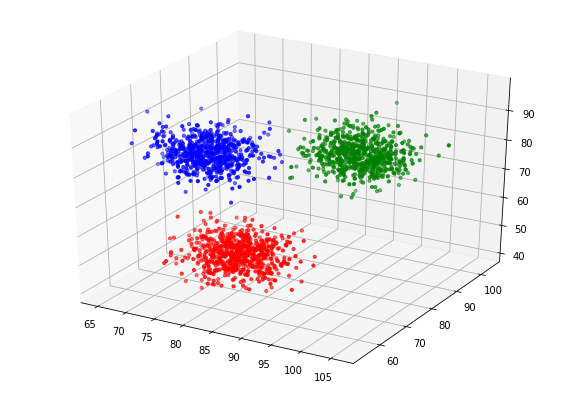

In [27]:
from sklearn.datasets.samples_generator import make_blobs
"""Generate centers for of clusters"""
centers = [np.random.randint(low = 50, high = 100, size = (3)) for i in range(3)]

"""Generate std for clusters"""
cluster_std = [np.random.randint(low = 2, high = 5, size = (1)) for i in range(3)]

"""Generate blobs for testing algorithms"""
X, y = make_blobs(n_samples=2000, cluster_std=cluster_std, centers = centers, n_features=3, random_state=0)

"""
Generate some outliers for testing algorithms
For each center add 5 outliers
"""
for i in range(len(centers)): 
    for j in range(5):
        op = random.choice([0, 1])
        if op == 0: shift = np.random.randint(low = 20, high = 30, size = (3))
        else: shift = np.random.randint(low = -30, high = -20, size = (3))
        np.append(X, np.add(centers[i], shift))
        np.append(y, i)

X = np.cast['float32'](X)
plotblob(X,y)

In [28]:
"""Using both algorithm to assign clusters for generated data"""
iteration = 1000;
#NMF
W, H, training_costNMF, predicted_cluster = NMF(X, k_components=3, max_iter=iteration,display_step=iteration/10)
#k-means
assignments, training_costkmeans = kmeans(X,3,5)
print(predicted_cluster);print(assignments)

Epoch:    0  Cost= 1245863.811
Epoch:  100  Cost= 61062.653
Epoch:  200  Cost= 34423.064
Epoch:  300  Cost= 9883.936
Epoch:  400  Cost= 2418.060
Epoch:  500  Cost= 787.517
Epoch:  600  Cost= 419.098
Epoch:  700  Cost= 306.639
Epoch:  800  Cost= 252.579
Epoch:  900  Cost= 220.253
NMF training ends
Epoch:    0  Cost= 19215.637
k-means training ends
[0 1 0 ... 2 1 1]
[1 2 2 ... 0 2 0]


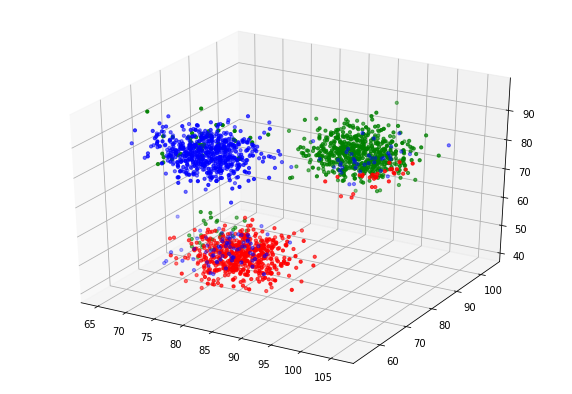

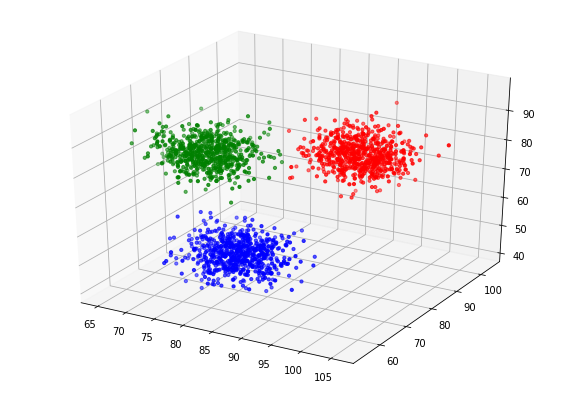

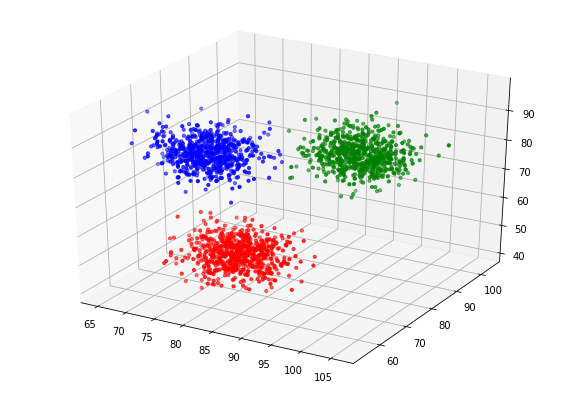

In [29]:
"""Plot clusters and cluster assignments"""
V = inverse_transform(W, H)
plotblob(X,predicted_cluster)#NMF Cluster Assignments
plotblob(X,assignments)#k-means Cluster Assignments
plotblob(X,y)#Original Cluster Assignments